# Weak <-> Strong converge equivalence in $R^2$

Let $H$ be a Hilbert space, $(x_n)_{n ∈ \mathbb{N}}$ is sequence of element in $H$ and $x$ $∈ H$.

### Weak convergence

* $(x_n)_{n ∈ \mathbb{N}}$ is said to be weakly converging  to $x$ if: $ (∀ y ∈ H)$ $\lim_{n \to +\infty} \langle y | x_n - x \rangle = 0$.

It's comonmy denoted by: $(x_n) \rightharpoonup  x$.

### Strong convergence

* $(x_n)_{n ∈ \mathbb{N}}$ is said to be strongly converging  to $x$ if:  $\lim_{n \to +\infty}  \| x_n - x \| = 0$.

It's comonmy denoted by: $(x_n) \to x$.

### Intuition and Meaning
The strong convergence is the most known, it is in fact one of the reaons to introduce norms into vector spaces. The weak convergence on the other hand seems to be a bit confusing since inner product appears in its formula. But using this trick is going to make it clearer:

* $ (∀ y ∈ H)$ $\lim_{n \to +\infty} \langle y | x_n - x \rangle = 0$ ⇔ $ (∀ y ∈ H)$ $\lim_{n \to +\infty} \langle y | x_n \rangle$ = $ \langle y | x \rangle$.

Thus we can deduce: For any given $y$ the projection of $x_n$ onto $y$ start to look similar to the projection of $x$ onto $y$, we can say a "directional" kind of convergence.

* In a finite dimensional Hilbert space weak and strong convergences are equivalent.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def x_cordinate(n):
    return (n/(n + 1))

def y_cordinate(n):
    return (1 / n)

In [17]:
x = np.array([1, 0])
x_1 = np.array([x_cordinate(1), y_cordinate(1)])
x_n = np.array([x_cordinate(2), y_cordinate(2)])
eps = 1e-10
n = 2
memory = np.array([x_1, x_n])
while(np.linalg.norm(x_1 - x_n)) > eps:
    n += 1
    x_1 = x_n
    x_n = np.array([x_cordinate(n), y_cordinate(n)])
    memory = np.vstack((memory, x_n))
print("converged to: ", x_n)
limit = np.linalg.norm(x - x_n)
print("limit: ", limit)

converged to:  [9.99991591e-01 8.40894375e-06]
limit:  1.1891992300921354e-05


Weak convergence:

In [5]:
y = np.random.rand(2)
print("dot product with x_n: {:.3f}".format(np.dot(y, x_n)))
print("dot product with x: {:.3f}".format(np.dot(y, x)))

dot product with x_n: 0.450
dot product with x: 0.450


Text(0.5, 0.92, 'Convergence path over iterations')

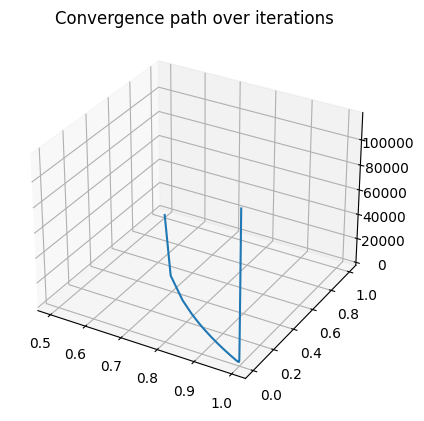

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z = np.linspace(0, len(memory), len(memory))  # This can be a representation of iterations
x_values = memory[:, 0]
y_values = memory[:, 1]

ax.plot(x_values, y_values, z)
ax.set_title("Convergence path over iterations")